In [1]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Import, and slice data (2nd sample group first 100 responses from revised survey, not including 1st sample group of 20)

df = pd.read_csv("UMass Sustainability Initiative.csv", sep=",")


In [3]:
#basic data analysis for quantitive data, habits and age distribution

def distribution(df):
    print(f'The mean is {df.mean()} the Standard Erorr of the mean is {stats.sem(df, axis=None, ddof=0)}')
    print(f'The variance is {statistics.variance(df)} the standard deviation is {df.std()}')
    print(f'The min is {df.min()}, Q1 is {np.quantile(df, .25)}, median is {df.median()}, Q3 is {np.quantile(df, .75)}, max is {df.max()}')
    print(f'Skewness: {stats.skew(df)}')
        
#distribution(df['Habits'])


In [4]:
#Data Cleaning

df.rename(columns = { 'How old are you?':'Age', 'What is your gender?':'Gender', 'What occupation do you hold in the University?':'Occupation',
                     'What year are you?':'Year', 'What is your major?':'Major',
                     'Do you live on campus?':'On Campus', 'If you do live on campus, where do live?':'Location',
                     'How often do you recycle?':'Frequency', "Why do you recycle? (Don't answer if you don't)":'Reasoning',
                     'Are the recycling rules on campus clearly presented?':'Rules', 
                     'If not, if the recycling rules were clearer would you be more likely to recycle?':'Likelihood',
                     'Do you look for the recycle symbol before recycling?':'Symbol', 'What items do you usually recycle?':'Items',
                     'Did the survey overall make you think about your own personal recycling methods and habits?':'Habits',
                     'Whats the best way to reach you for the prize draw? (Email, Phone, etc. )':'Prize'}, inplace = True)

#fill with None?
#df.fillna(None, inplace=True)

#Splitting strings into arrays, not actually useful! Strings have useful methods see electronics cell below
#df['Reasoning'] = df['Reasoning'].str.split(";", expand = False)
#df['Items'] = df['Items'].str.split(";", expand = False)

#age data cleaning....
df['Age'].replace(to_replace = "Twenty", value = int(20), inplace = True) 
df['Age'].replace(dict.fromkeys(['I am banes', 'RECYCLING IS FOR NERDS'], int(20)), inplace = True)
#df['Age'].replace(to_replace = 1, value = 20, inplace = True) 

#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
df['Major'].replace(dict.fromkeys(['CIS', 'Computer Science', 'Computer science', 'Computer science'], 
                                  'College of Engineering'), inplace = True)
df['Major'].replace(dict.fromkeys(['MIS', 'Accounting', 'Marketing'], 'College of Business'), inplace = True)

#focus group 1 is now df1
df1 = df.iloc[0:100]

df.head(3)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
0,2020/02/18 4:03:42 PM AST,20,Male,NaN,Sophomore,College of Engineering,Yes,Birch,Often,Sustainability;Ease of Access,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,3,NaN
1,2020/02/18 4:05:49 PM AST,20,Male,NaN,Junior,College of Engineering,Yes,Aspen,Always,Sustainability;Habit,No,Yes,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,jegan2@umassd.edu
2,2020/02/18 4:09:10 PM AST,23,Male,NaN,Junior,College of Engineering,No,NaN,Always,Habit,Yes,NaN,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,2,NaN


In [5]:
# age data analysis, pain in the neck
#df['Age'].fillna(method = 'ffill')
#df.reset_index(drop=True)
#df['Age'].dtype #object type
df['Age'].value_counts()
df.Age = df.Age.astype(int)
#print(df['Age'].mean(skipna=True))

distribution(df['Age'])



20.995515695067265
The mean is 20.995515695067265 the Standard Erorr of the mean is 0.20681338978597666
The variance is 19.119080969416032 the standard deviation is 4.372537131851029
The min is 1, Q1 is 19.0, median is 20.0, Q3 is 21.0, max is 69
Skewness: 5.248536725869289


In [6]:
# habits data analysis, luckily a lot easier
#print(df['Habits'].mean(skipna=True))

distribution(df['Habits'])
df['Habits'].value_counts()


3.820627802690583
The mean is 3.820627802690583 the Standard Erorr of the mean is 0.04991749634132685
The variance is 1.113820728573588 the standard deviation is 1.05537705516729
The min is 1, Q1 is 3.0, median is 4.0, Q3 is 5.0, max is 5
Skewness: -0.8778922187614709


In [7]:
#basic data analysis for qualtitve data, Major Location Frequency Reasoning Items ... etc

#to be filled in...

In [8]:
#Sorting entries (potential group of interest could be people with low habits, majority of people had high schore for habits)

df.sort_values('Major', ascending=True)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
136,2020/02/19 10:25:11 AM AST,33,Female,NaN,Junior,ABSN,No,NaN,Sometimes,Ease of Access,Yes,Yes,Yes,Cardboard;Plastic Bottles;Glass Bottles,4,jamie.l.eldridge@gmail.com
280,2020/02/24 3:42:21 PM AST,21,Male,Student,Junior,AGA,Yes,Aspen,Sometimes,Sustainability,No,Yes,Yes,Cardboard;Glass Bottles;Aluminum Cans,4,NaN
224,2020/02/19 4:19:06 PM AST,21,Male,NaN,Senior,Accounting,Yes,Dells,Often,Ease of Access,I didn't know there were any recycling rules!,No,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,dadamski@umassd.edu
209,2020/02/19 2:41:08 PM AST,22,Male,NaN,Senior,Accounting,Yes,Dells,Sometimes,Habit,Yes,No,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,4,sbarrett1@umassd.edu
330,2020/02/25 5:31:10 PM AST,21,Male,Student,Senior,Accounting,Yes,Dells,Sometimes,Ease of Access,No,No,No,Electronics;None,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020/02/26 4:57:23 PM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit;Concern fo...,I didn't know there were any recycling rules!,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,3,9783824947
398,2020/02/27 5:52:42 PM AST,22,Female,Student,Graduate,NaN,Yes,Ivy,Often,Ease of Access,Yes,NaN,Yes,Cardboard;Plastic Bottles;Plastic Bags,4,9125321665
405,2020/02/28 10:18:50 AM AST,21,Female,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Habit,No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags,5,victoria2222222@gmail.com
416,2020/03/02 11:06:52 AM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit,I didn't know there were any recycling rules!,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,4,9783824947


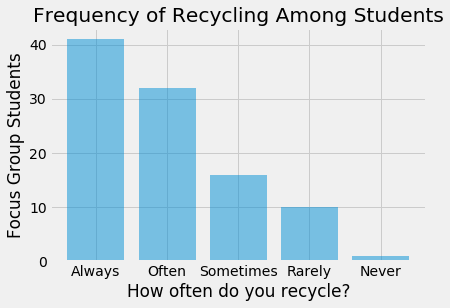

In [9]:
#Initial data analysis with Bar plots on recycling frequency (Focus Group Students)
#we can assume that all first 100 surveys are students since we manually surveyed students with QR codes on our phones

plt.style.use('fivethirtyeight')
x = np.arange(5)

plt.bar(x, df1['Frequency'].value_counts(), align='center', alpha=0.5)
plt.xticks(x, ('Always', 'Often', 'Sometimes', 'Rarely', 'Never'))
plt.title('Frequency of Recycling Among Students')
plt.xlabel('How often do you recycle?')
plt.ylabel('Focus Group 2 Students')
plt.show()
#cumulative frequency would be cool on the graph above, Pareto Chart

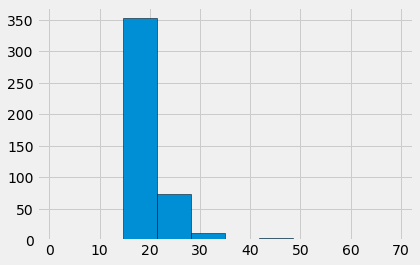

20    119
21    100
19     84
18     49
22     34
23     18
24      8
25      7
29      6
27      4
33      3
45      2
30      2
17      1
69      1
26      1
50      1
28      1
31      1
35      1
42      1
47      1
1       1
Name: Age, dtype: int64

In [29]:
#"histogram" and bar plot of Age 

plt.hist(df['Age'], edgecolor='black')
plt.show()

#above plot isn't actually a histogram its a bar graph but I'm having difficult formatting age on a bar plot
#Using value counts orders the series by frequency which isn't wanted waiting to format graph labels 
#below code doesn't work
#plt.bar(x, df['Age'].value_counts(), edgecolor='black')
#plt.show()

#useful to consider
df['Age'].value_counts()

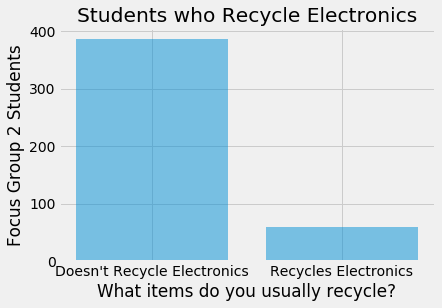

In [26]:
#Data analysis on Items column, specifically electronic subset

AC = df.Items.str.contains(pat = 'Electronics') 
#AC.value_counts().plot(kind='bar'), same as code below without formatting

x = np.arange(2)

plt.bar(x, AC.value_counts(), align='center', alpha=0.5)
plt.xticks(x, ("Doesn't Recycle Electronics", 'Recycles Electronics'))
plt.title('Students who Recycle Electronics')
plt.xlabel('What items do you usually recycle?')
plt.ylabel('Focus Group 2 Students')
plt.show()

#df1.Items.value_counts()

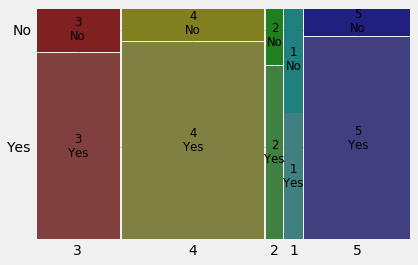

In [27]:
#mosaic plot
m = df.groupby(["Symbol", "Likelihood"]).sum()

mosaic(df, ["Habits", "Symbol"])
plt.show()